# NFL Play Type Classificaiton
By: Paul Tuccinardi

## Pull Data

In [ ]:
import nfl_data_py as nfl
import pandas as pd

In [ ]:
years = [2023,2024]
data = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)
print(df)

## EDA

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
print(df.head())
print(df.columns)

C:\Users\Paul Tuccinardi\AppData\Local\Temp\ipykernel_14932\162201929.py:1: DtypeWarning: Columns (179,180,182,183,189,190,197,198,203,204,205,206,218,219,220,222,224,226,233,234,235,236,237,238,248,249,253,254,255,260,262,263,283,284,332,387) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


   play_id          game_id  old_game_id_x home_team away_team season_type  \
0      1.0  2023_01_ARI_WAS     2023091007       WAS       ARI         REG   
1     39.0  2023_01_ARI_WAS     2023091007       WAS       ARI         REG   
2     55.0  2023_01_ARI_WAS     2023091007       WAS       ARI         REG   
3     77.0  2023_01_ARI_WAS     2023091007       WAS       ARI         REG   
4    102.0  2023_01_ARI_WAS     2023091007       WAS       ARI         REG   

   week posteam posteam_type defteam  ... was_pressure       route  \
0     1     NaN          NaN     NaN  ...          NaN         NaN   
1     1     WAS         home     ARI  ...        False         NaN   
2     1     WAS         home     ARI  ...        False         NaN   
3     1     WAS         home     ARI  ...        False  HITCH/CURL   
4     1     WAS         home     ARI  ...        False         NaN   

  defense_man_zone_type  defense_coverage_type  \
0                   NaN                    NaN   
1         

In [ ]:
features = [
    'down', 'ydstogo', 'yardline_100', 'qtr',
    'half_seconds_remaining', 'score_differential',
    'posteam', 'defteam', 'play_type', 'home_team','away_team', 
    'yrdln','ydsnet', 'play_type', 'desc', 'yards_gained', 'shotgun',
    'no_huddle','qb_dropback', 'qb_scramble','pass_length','pass_location',
    'air_yards','yards_after_catch','run_location','run_gap','field_goal_result',
    'kick_distance','extra_point_result','two_point_conv_result','home_timeouts_remaining','away_timeouts_remaining', 'td_team',
   
]
df = df[features]

In [4]:
print(df.head())

   down  ydstogo  yardline_100  qtr  half_seconds_remaining  \
0   NaN      0.0           NaN  1.0                  1800.0   
1   NaN      0.0          35.0  1.0                  1800.0   
2   1.0     10.0          75.0  1.0                  1800.0   
3   2.0      7.0          72.0  1.0                  1770.0   
4   3.0      1.0          66.0  1.0                  1735.0   

   score_differential posteam defteam play_type home_team  ...  \
0                 NaN     NaN     NaN       NaN       WAS  ...   
1                 0.0     WAS     ARI   kickoff       WAS  ...   
2                 0.0     WAS     ARI       run       WAS  ...   
3                 0.0     WAS     ARI      pass       WAS  ...   
4                 0.0     WAS     ARI       run       WAS  ...   

  yards_after_catch run_location  run_gap field_goal_result kick_distance  \
0               NaN          NaN      NaN               NaN           NaN   
1               NaN          NaN      NaN               NaN          6

In [5]:
print(df.describe())

               down       ydstogo  yardline_100           qtr  \
count  83408.000000  99157.000000   92155.00000  99157.000000   
mean       2.005071      7.149147      48.09751      2.564539   
std        1.006822      4.911596      24.00941      1.127301   
min        1.000000      0.000000       1.00000      1.000000   
25%        1.000000      3.000000      31.00000      2.000000   
50%        2.000000      9.000000      50.00000      2.000000   
75%        3.000000     10.000000      69.00000      4.000000   
max        4.000000     40.000000      99.00000      5.000000   

       half_seconds_remaining  score_differential        ydsnet  yards_gained  \
count            99147.000000        93806.000000  98027.000000  96152.000000   
mean               804.577920           -1.267584     40.867241      3.981300   
std                560.596844           10.456954     28.493480      7.744996   
min                  0.000000          -56.000000    -29.000000    -24.000000   
25%      

In [6]:
print(df.dtypes)

down                       float64
ydstogo                    float64
yardline_100               float64
qtr                        float64
half_seconds_remaining     float64
score_differential         float64
posteam                     object
defteam                     object
play_type                   object
home_team                   object
away_team                   object
yrdln                       object
ydsnet                     float64
play_type                   object
desc                        object
yards_gained               float64
shotgun                    float64
no_huddle                  float64
qb_dropback                float64
qb_scramble                float64
pass_length                 object
pass_location               object
air_yards                  float64
yards_after_catch          float64
run_location                object
run_gap                     object
field_goal_result           object
kick_distance              float64
extra_point_result  

In [7]:
print(sum(df.isna().count()))

3272181


C:\Users\Paul Tuccinardi\AppData\Local\Temp\ipykernel_14932\4012138713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation  = df.corr()
C:\Users\Paul Tuccinardi\AppData\Local\Temp\ipykernel_14932\4012138713.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


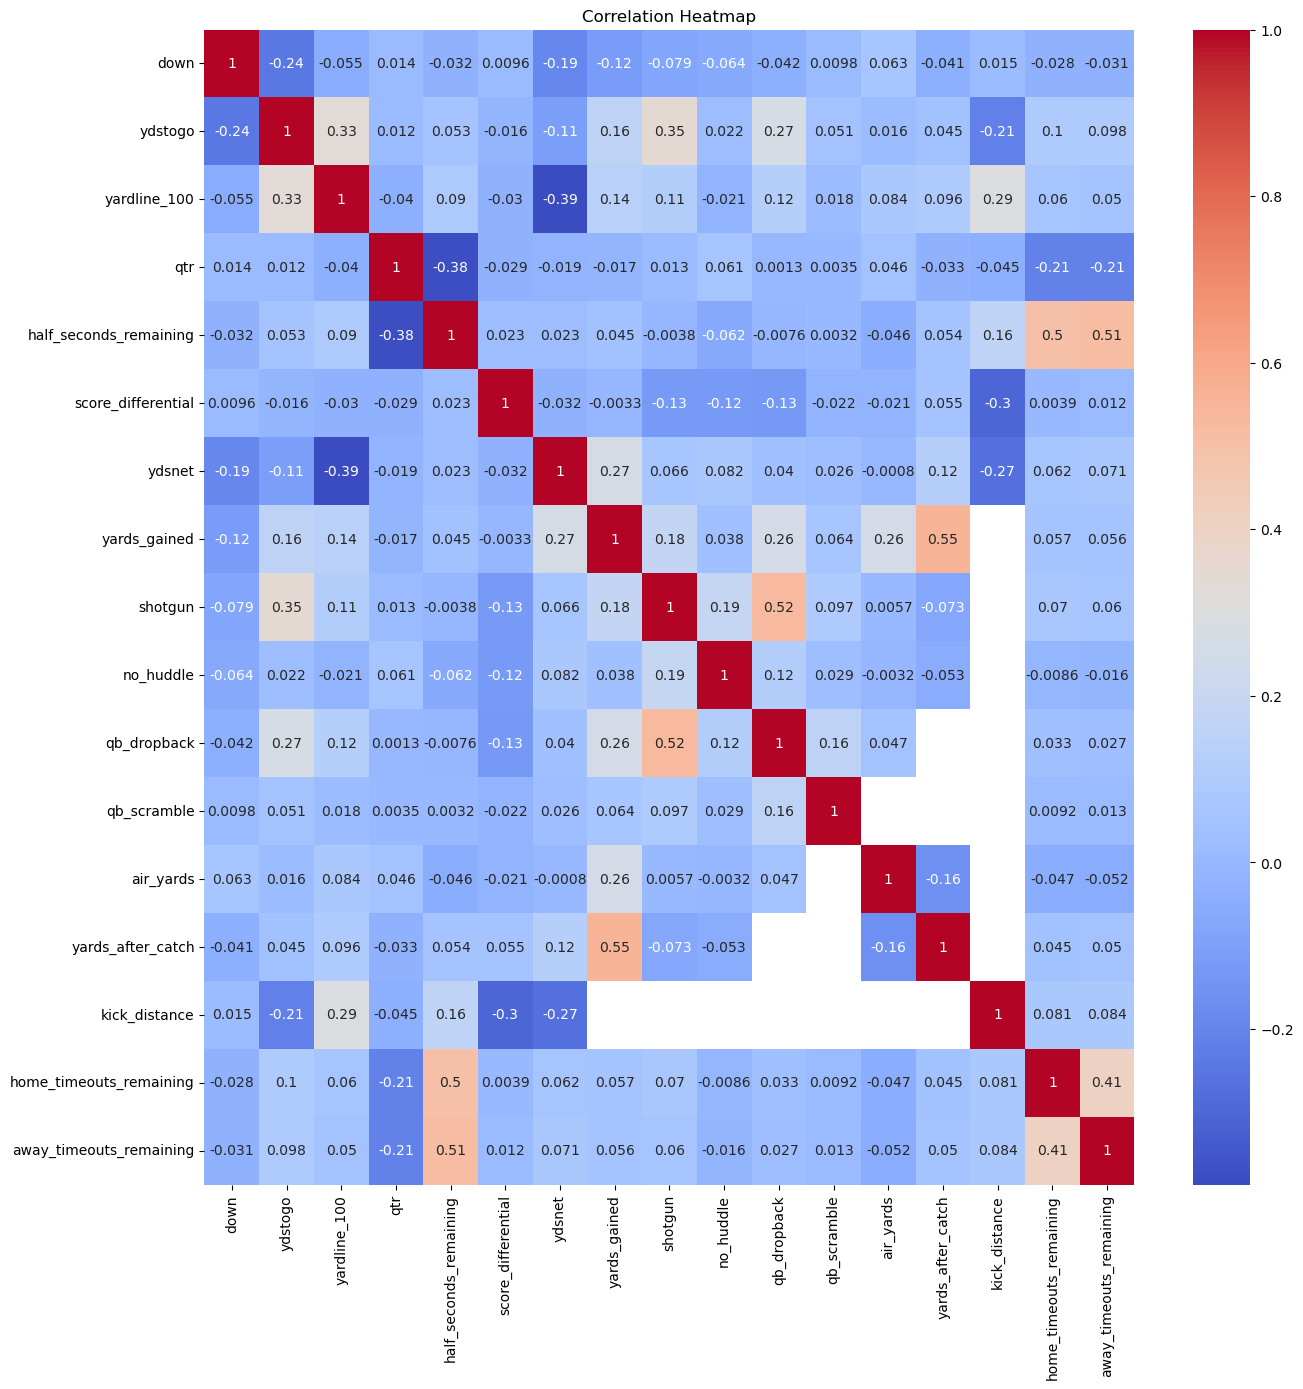

In [8]:
correlation  = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()